# **DATA VALIDATION AND DATA CLEANING**

In [106]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing file from url using pandas
url = 'https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv'
df = pd.read_csv(url)
df.shape

(15000, 8)

In [107]:
# Visualization of first 5 rows
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [108]:
# Summary statistics of only integer and float values
df2 = df.select_dtypes(include=['integer', 'float'])
df2.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [109]:
# Checking dtypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [110]:
# Sum of missing values per column
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [111]:
# Percentage of missing values per column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

week                 0.00
sales_method         0.00
customer_id          0.00
nb_sold              0.00
revenue              7.16
years_as_customer    0.00
nb_site_visits       0.00
state                0.00
dtype: float64

In [112]:
# Dropping all null values from revenue
df_cleaned = df.dropna()
df_cleaned.shape

(13926, 8)

In [113]:
# Checking for duplicates in unique customer ids
df_cleaned['customer_id'].duplicated().sum()

0

In [114]:
# Checking for unique years as customers (looking for outliers based on information)
df_cleaned['years_as_customer'].unique()

array([ 1,  6,  0, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36,  3, 15, 14, 19,
       13, 12, 11, 30, 22, 18, 23, 32, 16, 39, 25, 33, 21, 31, 24, 27, 34,
       28, 26, 29, 35, 38, 37, 63, 47])

In [115]:
# Filtering based on the year of the company's creation 
df_cleaned = df_cleaned[df_cleaned['years_as_customer'] <= 40]

In [116]:
# Checking for errors in summary statistics
df_cleaned.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000
mean,3.078282,10.040075,93.937828,4.971775,24.946926
std,1.650725,1.789819,47.437281,5.011542,3.491690
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.330000,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,37.000000


In [117]:
# Comparing the changes that filtering has made
df_cleaned.shape


(13924, 8)

In [118]:
# Verifying unique values in column
df_cleaned['sales_method'].value_counts() 

Email           6914
Call            4780
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64

In [119]:
# Replacing wrong inputs
df_cleaned['sales_method'] = df_cleaned['sales_method'].apply(lambda x: x.replace('em + call', 'Email + Call').replace('email', 'Email'))


In [120]:
# Verifying unique values in column again
df_cleaned['sales_method'].value_counts()

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

# **EXPLORATORY DATA ANALYSIS**

In [121]:
names = df.select_dtypes(include=['integer', 'float']).columns.tolist()
names

['week', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']

In [122]:
# The demonstration of data distribution and outliers detection in numerical single values.
def box(x):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_cleaned[x])
    plt.title(f'Boxplot of {x}')
    plt.xlabel(f'{x}')
    plt.show()

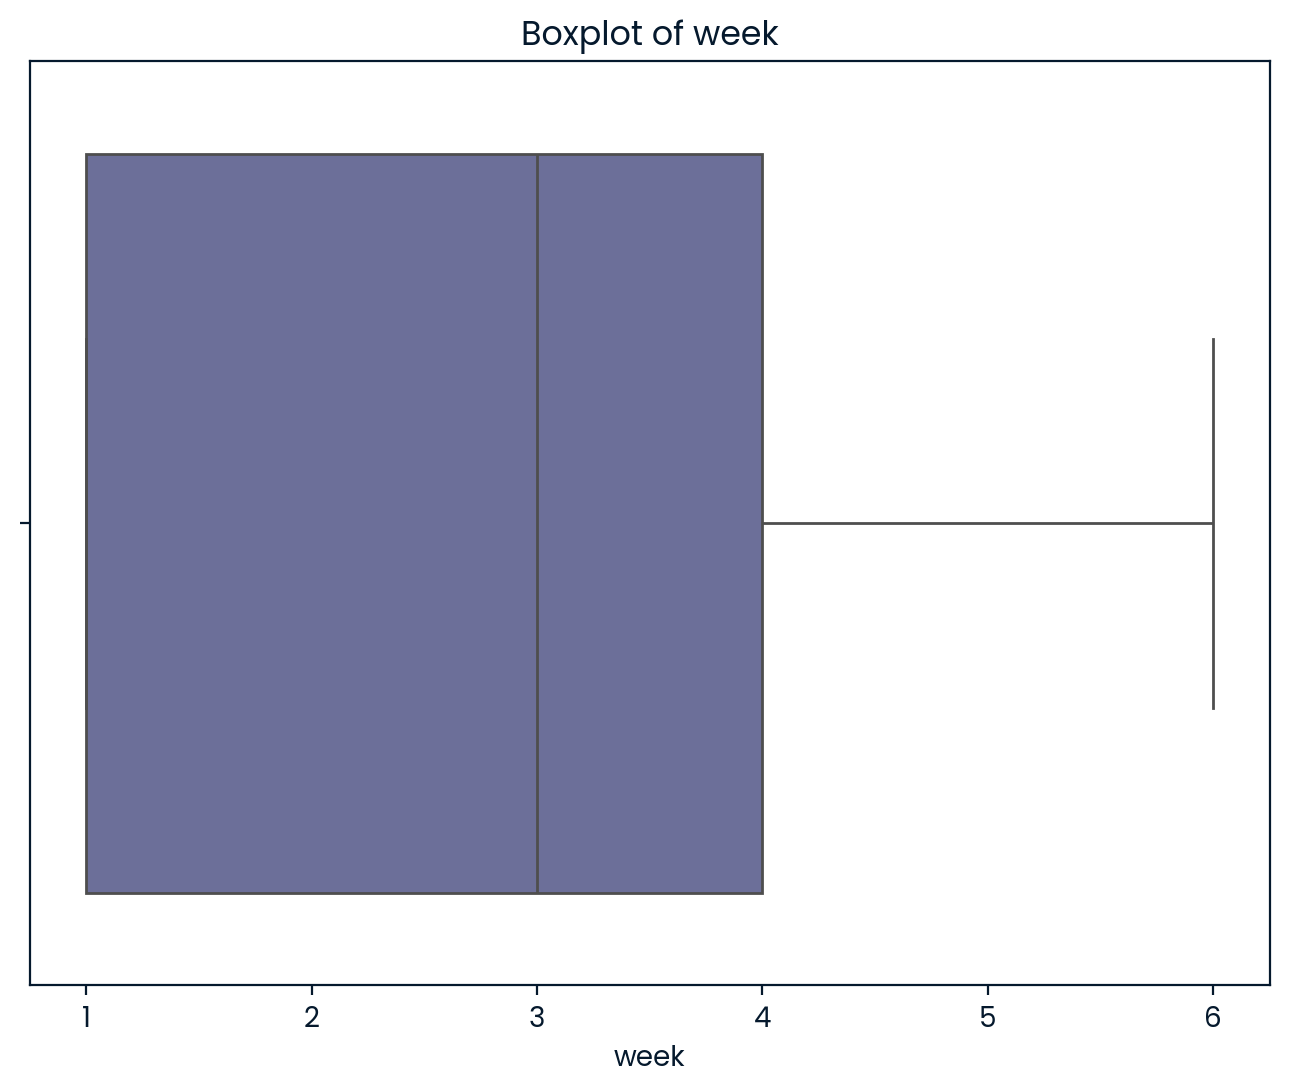

None


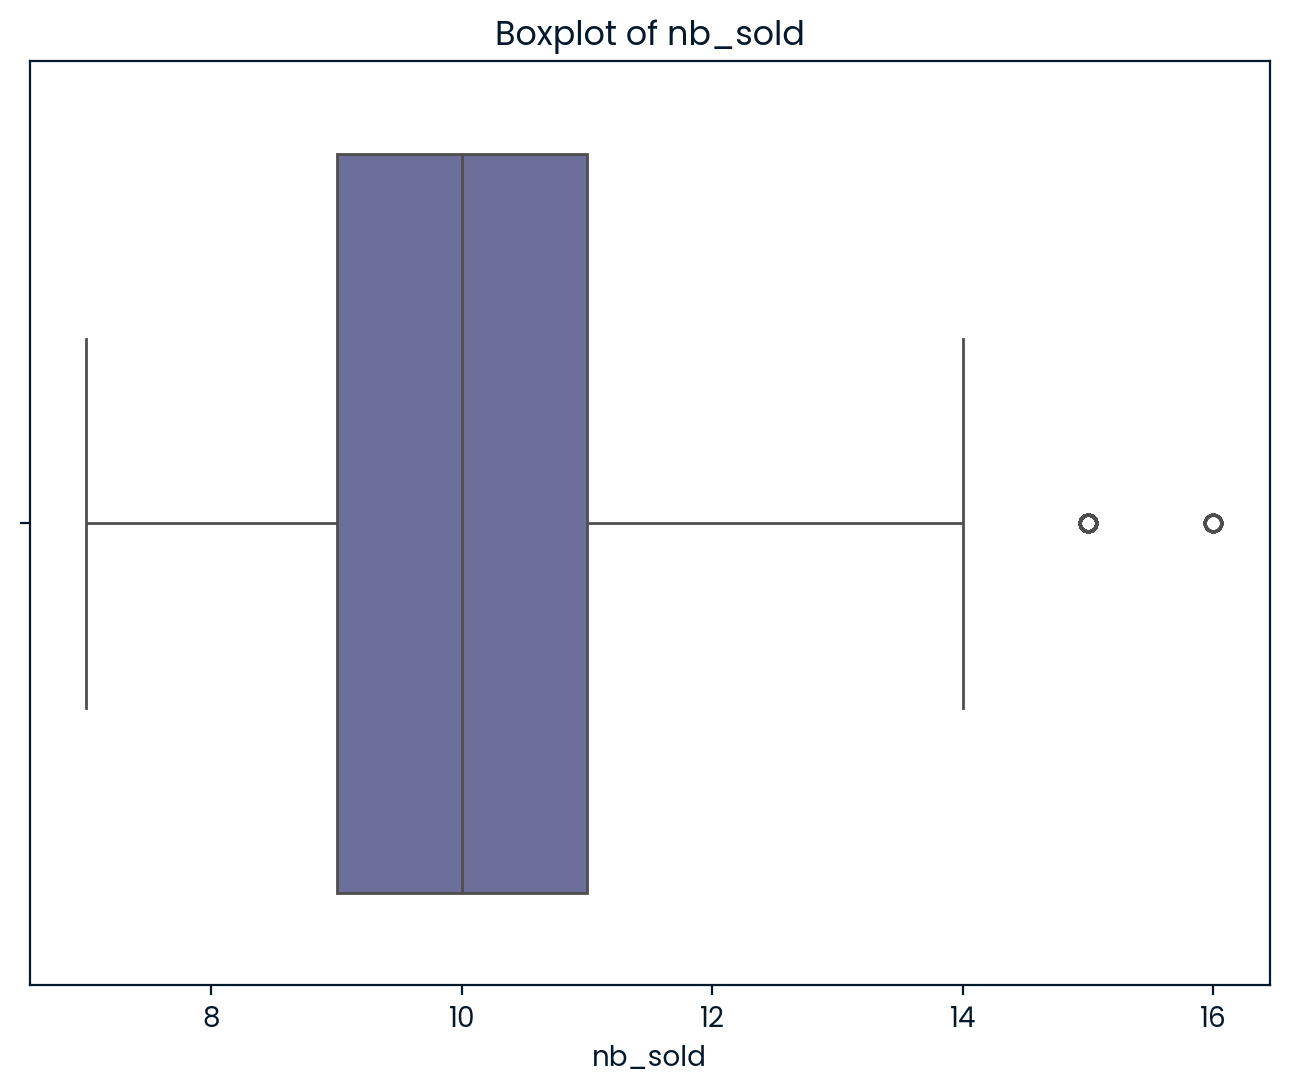

None


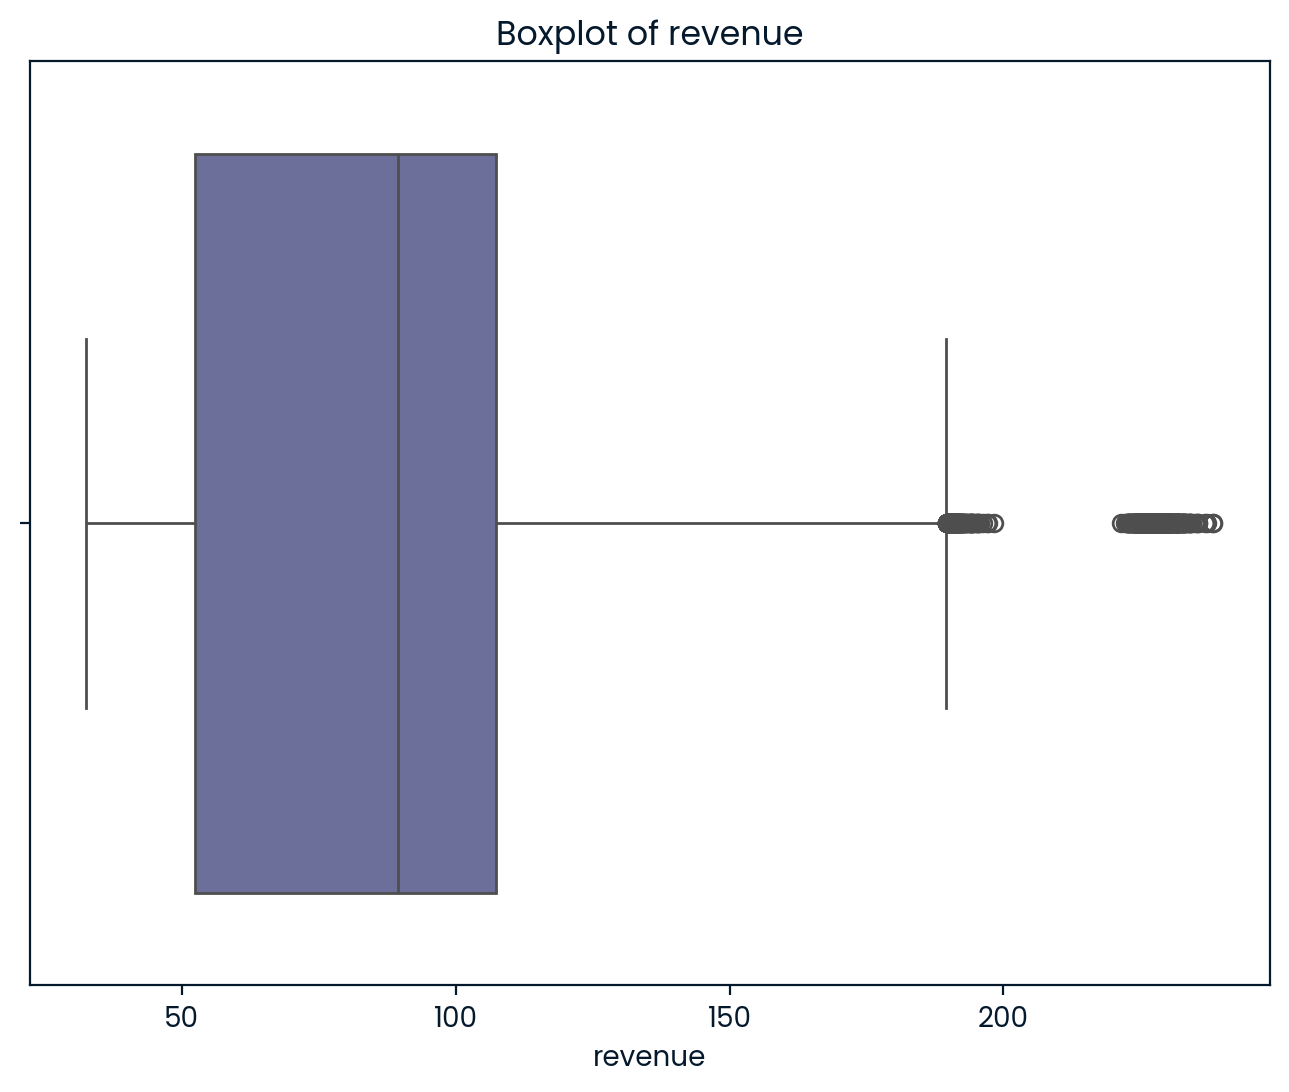

None


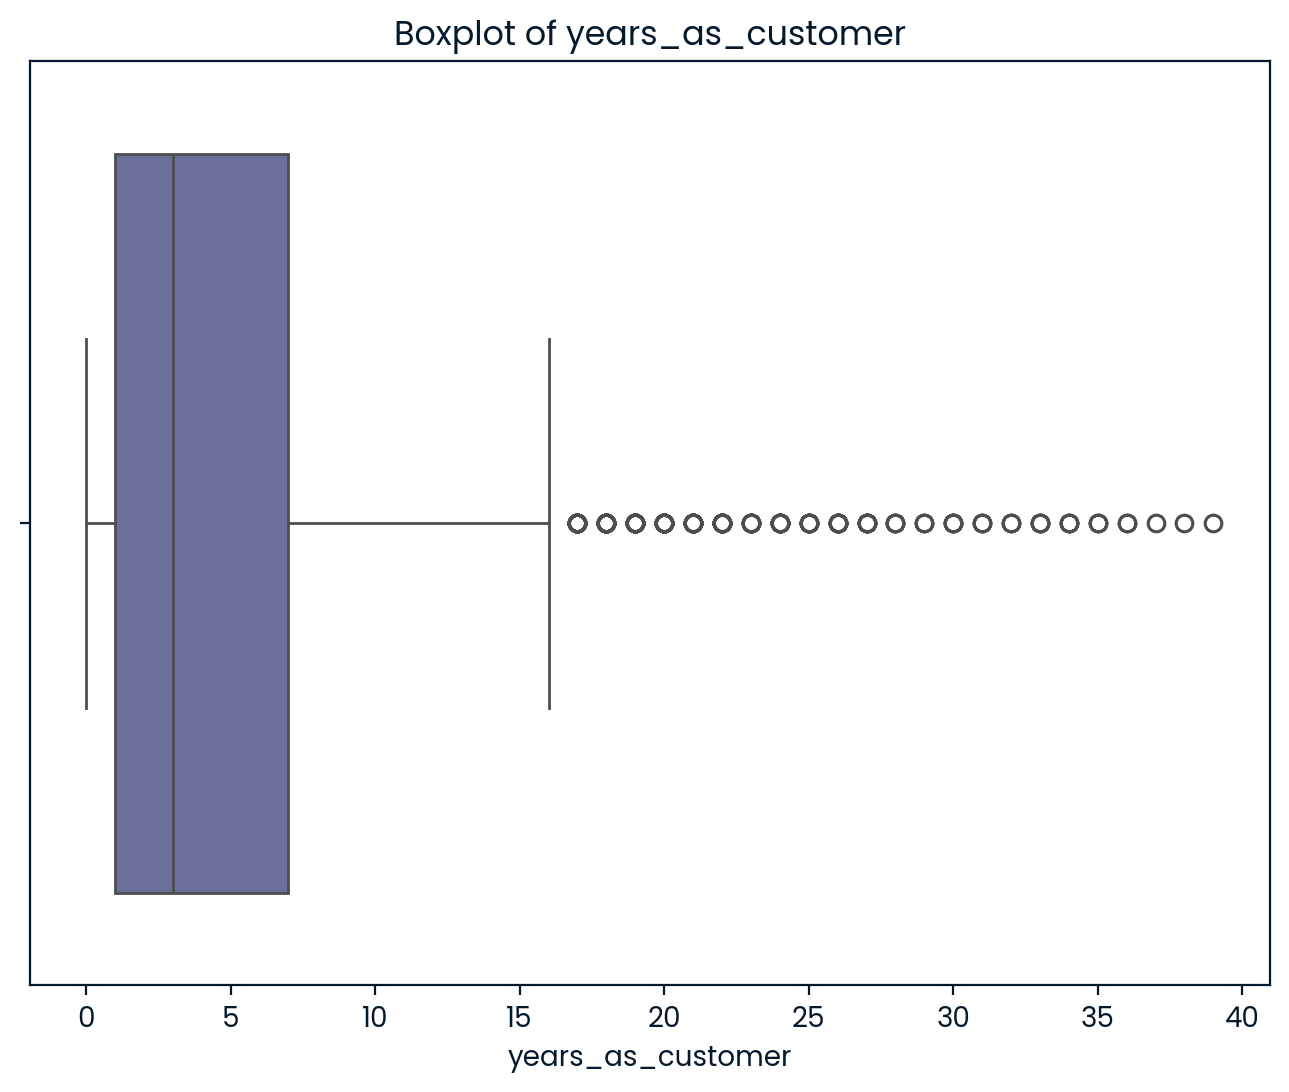

None


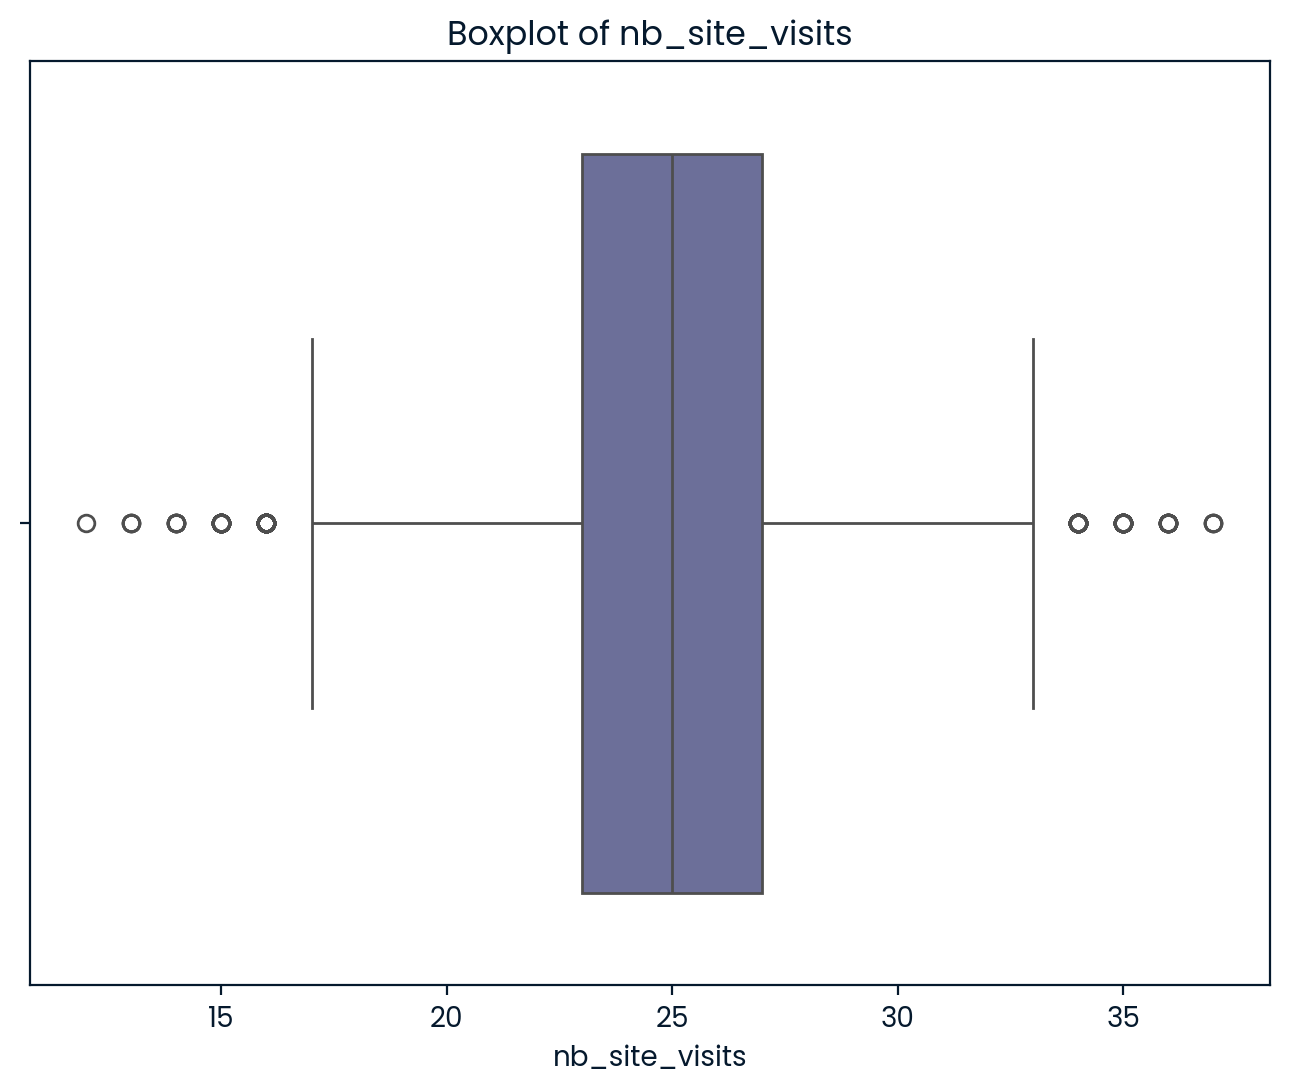

None


In [123]:
for x in names:
    print(box(x))

In [124]:
integ = df_cleaned.select_dtypes(include=['integer', 'float'])
correlation_matrix = integ.corr()
correlation_matrix
# We can see strong positive correlation between week and nb_sold.

,week,nb_sold,revenue,years_as_customer,nb_site_visits
week,1.000000,0.806611,0.356239,-0.082750,0.416474
nb_sold,0.806611,1.000000,0.696185,-0.099020,0.487677
revenue,0.356239,0.696185,1.000000,-0.064677,0.323144
years_as_customer,-0.082750,-0.099020,-0.064677,1.000000,-0.049500
nb_site_visits,0.416474,0.487677,0.323144,-0.049500,1.000000


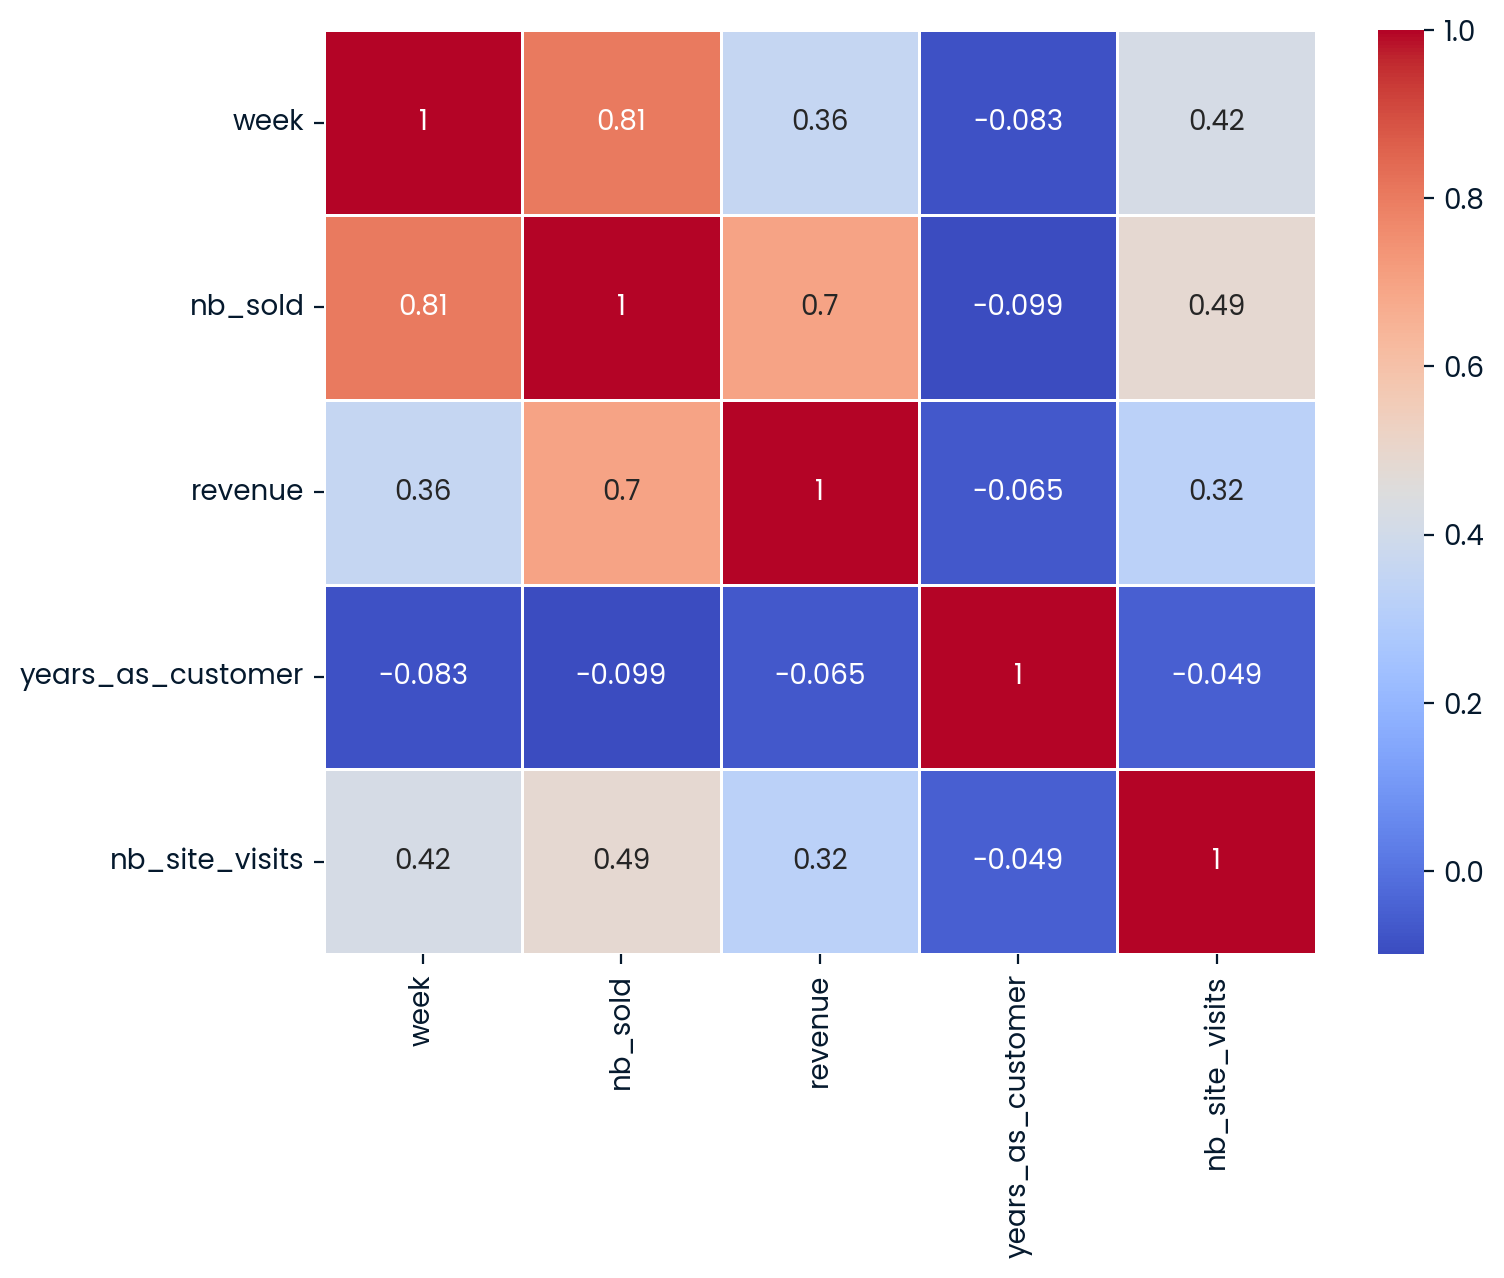

In [125]:
# Visualization of correlation between integer and float values
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

<AxesSubplot: xlabel='sales_method', ylabel='revenue'>

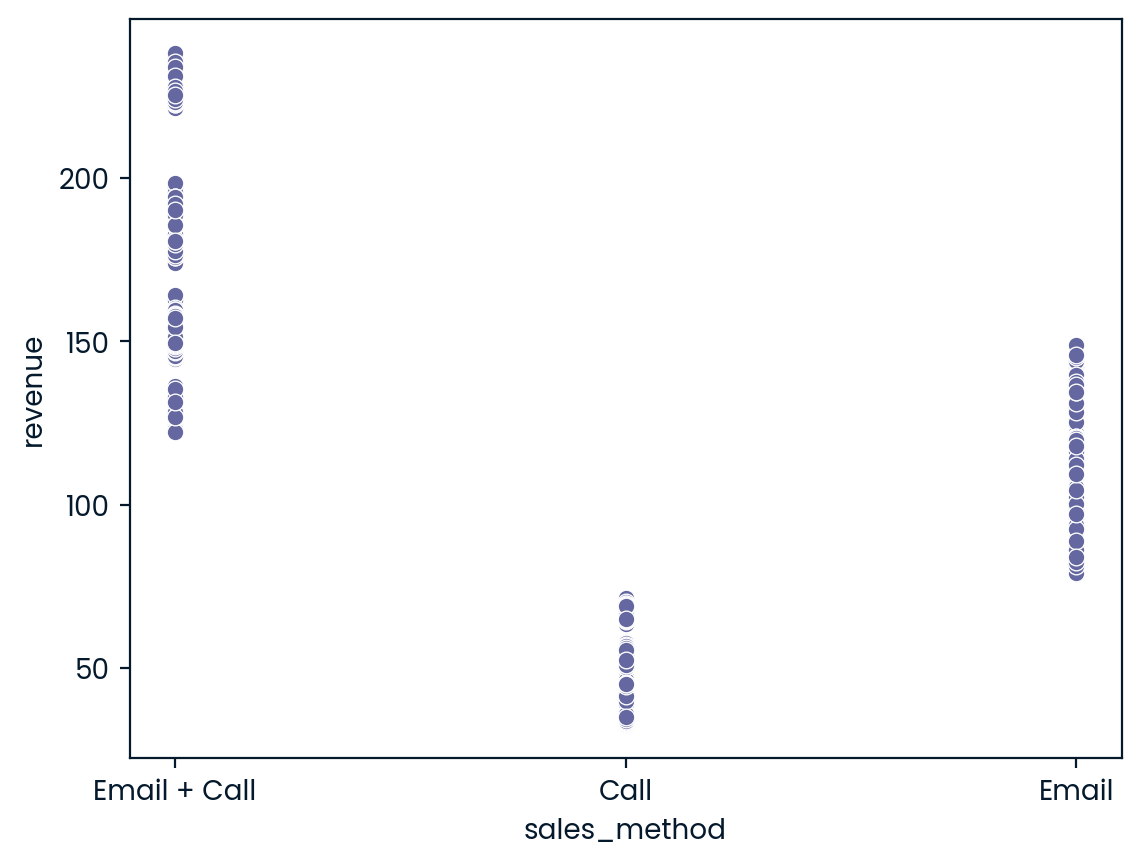

In [126]:
# Revenue by sales_method (relationship between features)
sns.scatterplot(data=df_cleaned,x='sales_method',y='revenue')

In [127]:
# Verifying value count per state
df_cleaned['state'].value_counts()

California        1737
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode Islan

<AxesSubplot: xlabel='state', ylabel='nb_site_visits'>

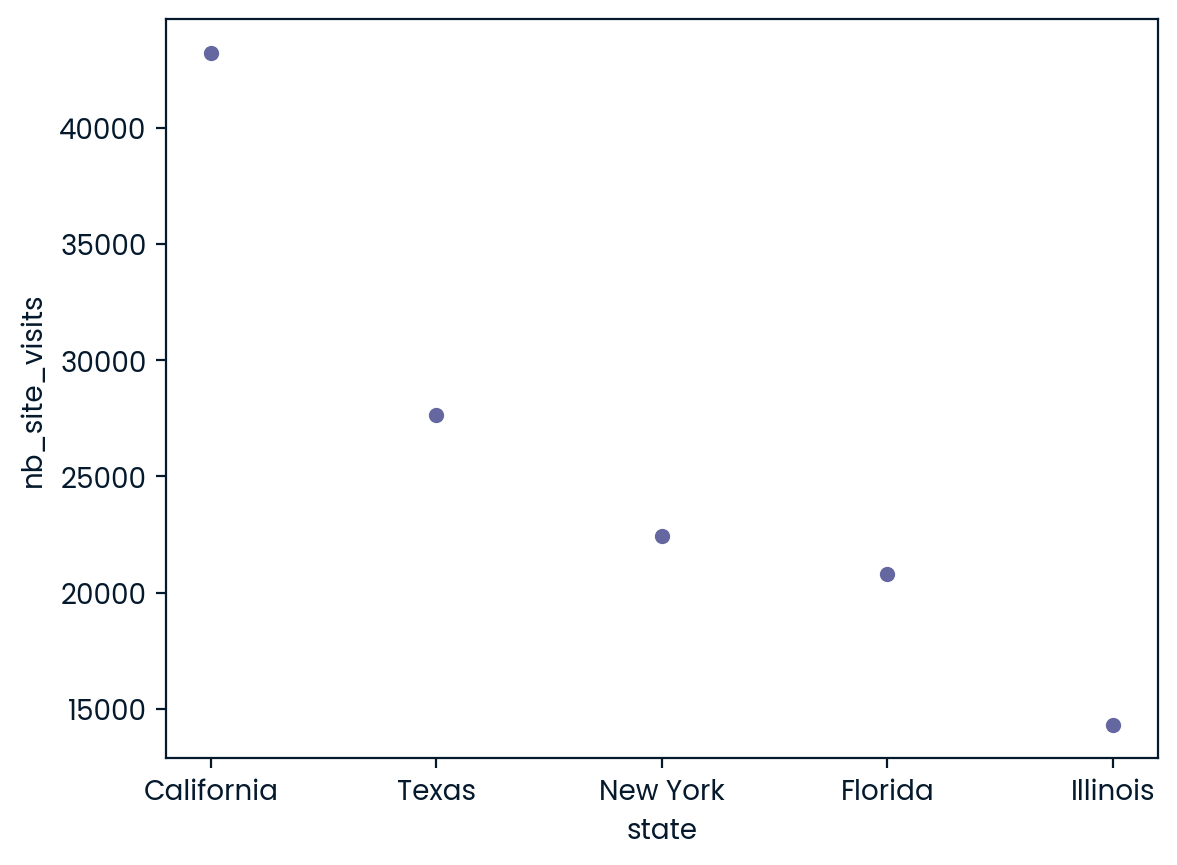

In [128]:
# Visualisation of nb of site visits by state (Top 5)
group = df_cleaned.groupby('state')['nb_site_visits'].sum().reset_index()
group = group.sort_values(by='nb_site_visits', ascending=False).reset_index(drop=True)
group1 = group.head(5)
sns.scatterplot(data=group1,x='state',y='nb_site_visits')

<AxesSubplot: xlabel='state', ylabel='revenue'>

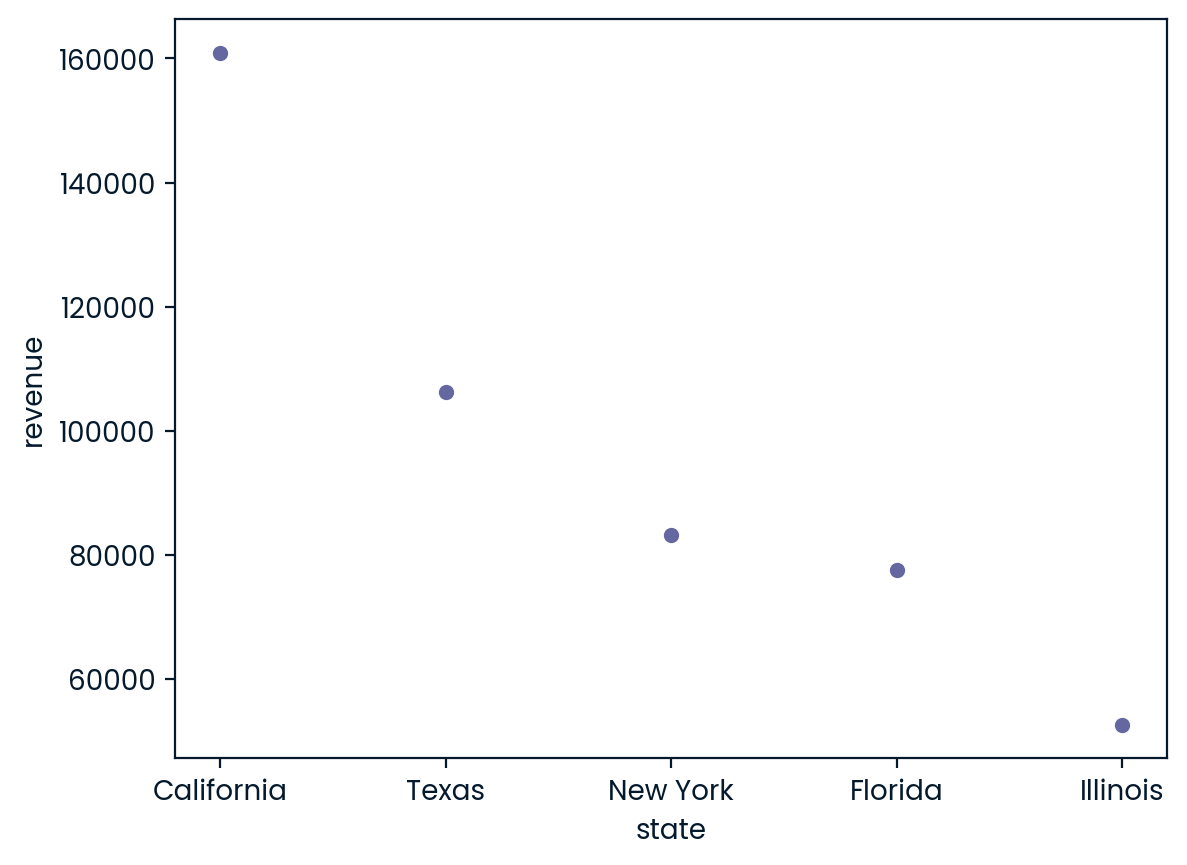

In [129]:
# Visualisation of revenue by state (Top 5)
group = df_cleaned.groupby('state')['revenue'].sum().reset_index()
group = group.sort_values(by='revenue', ascending=False).reset_index(drop=True)
group1 = group.head(5)
sns.scatterplot(data=group1,x='state',y='revenue')

In [130]:
# Revenue by years_as_customers
group = df_cleaned.groupby('years_as_customer')['revenue'].sum().reset_index()
group = group.sort_values(by='years_as_customer', ascending=False).reset_index(drop=True)
group2 = group
group2

,years_as_customer,revenue
0,39,186.90
1,38,133.98
2,37,227.85
3,36,267.22
4,35,359.60
5,34,599.76
6,33,631.85
7,32,322.37
8,31,558.79
9,30,577.14


<AxesSubplot: xlabel='years_as_customer', ylabel='revenue'>

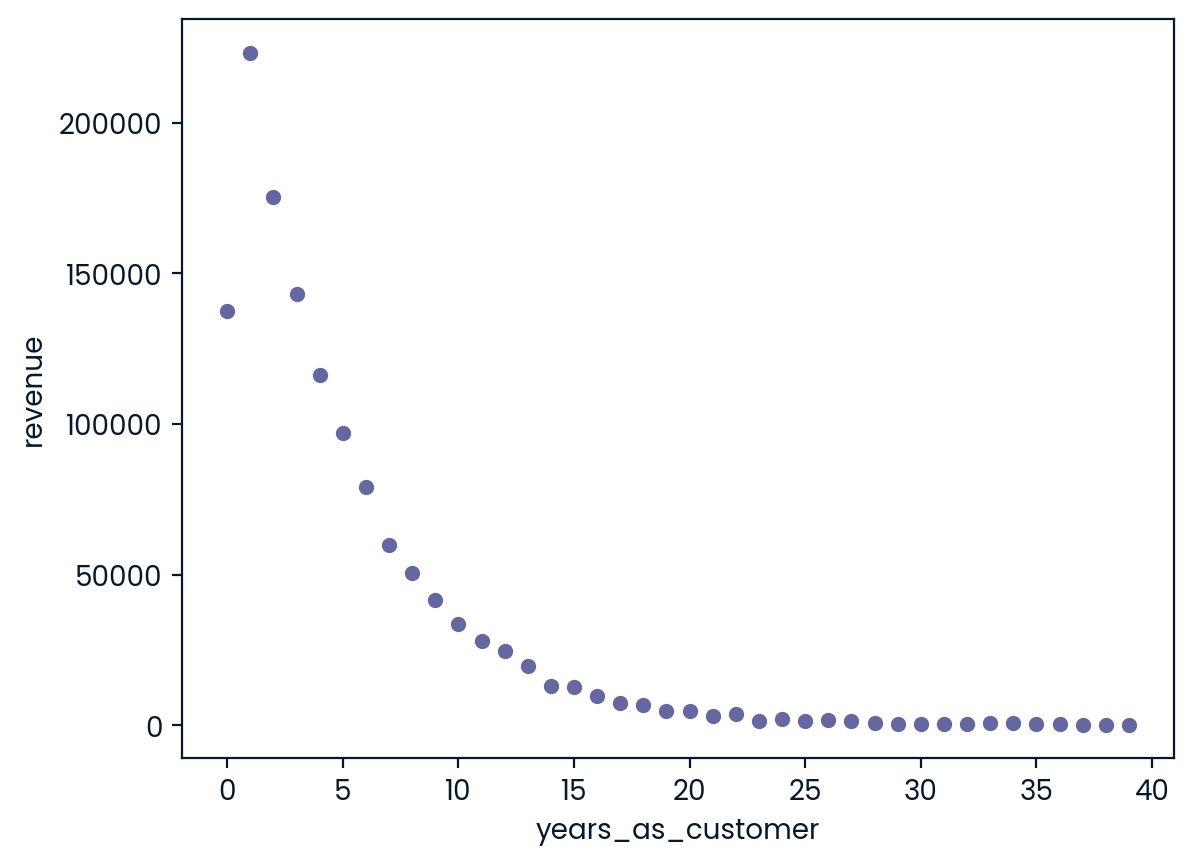

In [131]:
# Revenue by years_as_customers
df_grouped = df_cleaned.groupby('years_as_customer')['revenue'].sum().reset_index()
df_grouped
sns.scatterplot(data=df_grouped,x='years_as_customer',y='revenue')

In [132]:
group = df_cleaned.groupby('years_as_customer')['nb_site_visits'].sum().reset_index()
group = group.sort_values(by='nb_site_visits', ascending=False).reset_index(drop=True)
group3 = group
group3

,years_as_customer,nb_site_visits
0,1,58721
1,2,45960
2,3,37593
3,0,33997
4,4,30599
5,5,26018
6,6,21403
7,7,16420
8,8,13726
9,9,11722


<AxesSubplot: xlabel='nb_site_visits', ylabel='years_as_customer'>

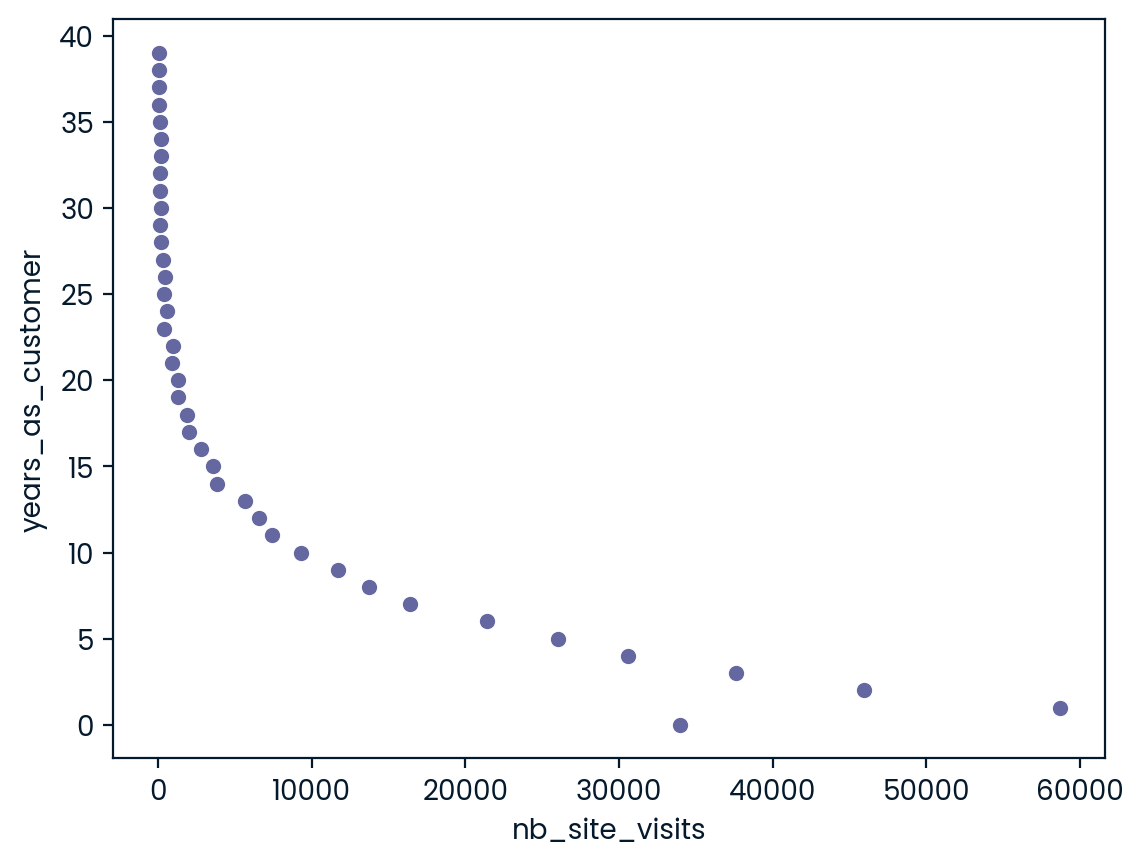

In [133]:
df_grouped = df_cleaned.groupby('years_as_customer')['nb_site_visits'].sum().reset_index()
df_grouped
sns.scatterplot(data=df_grouped,x='nb_site_visits',y='years_as_customer')

<AxesSubplot: xlabel='revenue', ylabel='nb_site_visits'>

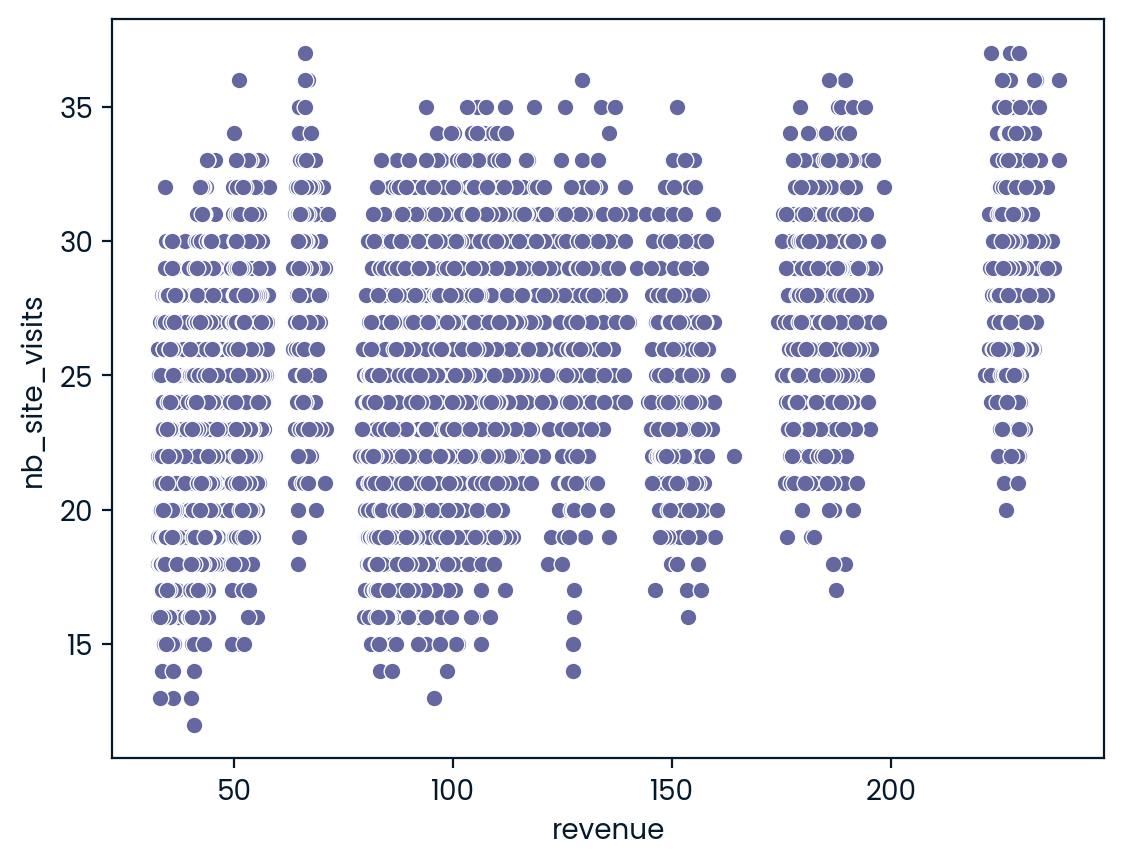

In [134]:
# Revenue by nb_site_visits
sns.scatterplot(data=df_cleaned,x='revenue',y='nb_site_visits')

<AxesSubplot: xlabel='week', ylabel='nb_sold'>

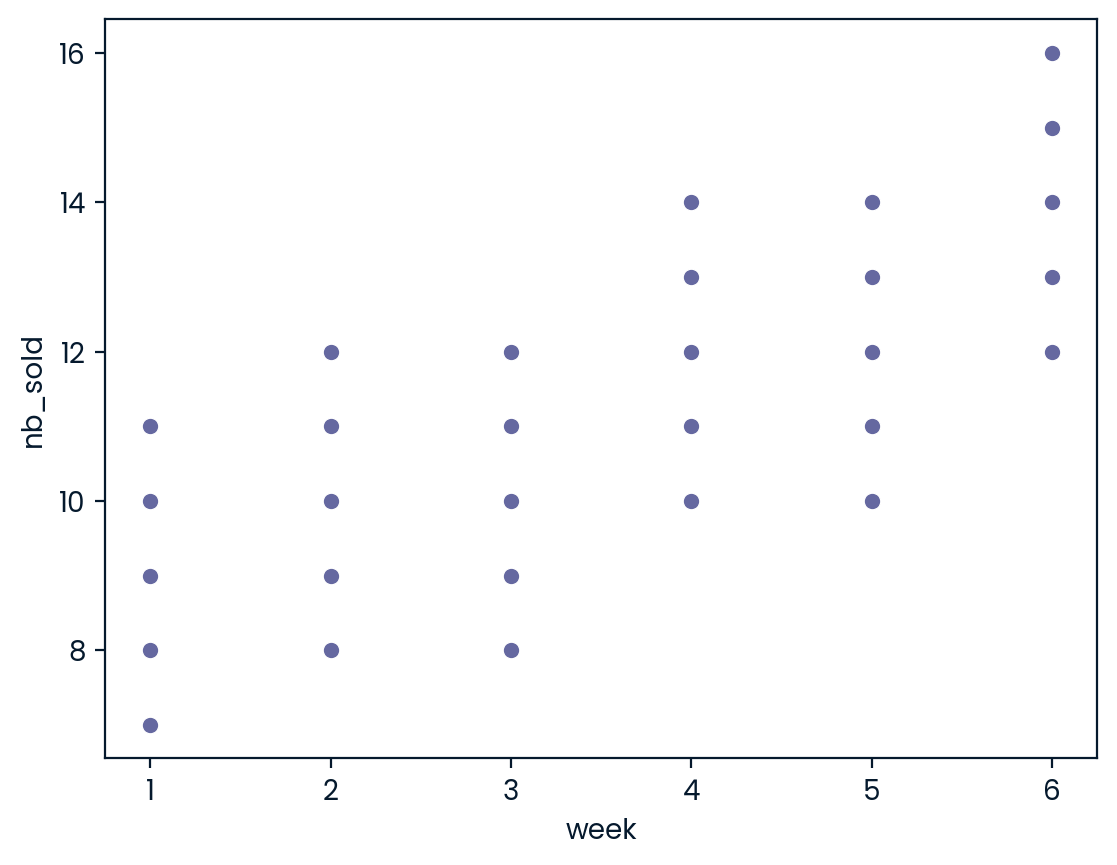

In [135]:
# Nb_sold by week
sns.scatterplot(data=df_cleaned,x='week',y='nb_sold')
# Dynamic of our selling goes down because weeks represent numbers of weeks since product launch

*DEFINITION OF METRIC FOR THE BUSINESS TO MONITOR*

To maximize our company’s revenue, we will focus on key metrics that directly impact profitability and provide actionable insights. Here are the most important metrics to monitor:

1) Revenue by State:
This metric helps identify trends or patterns in customer consumption across different states. If one state is underperforming, we can increase marketing efforts to boost sales and maximize revenue in that region. (We can estimate its value by sorting our data by state and revenue columns)


2) Sales per Method:
By evaluating sales across different methods, we can identify which channels are most effective in driving customer purchases. This insight allows us to allocate resources to the most successful methods and optimize our sales strategy. 


3) Website Visits and Revenue:
Our data shows a positive correlation between the number of site visits and revenue generation. Monitoring this metric will help us understand how web traffic translates into sales, enabling us to improve our online strategy. 


4) Customer Retention Rate:
Although we don’t have direct churn data, we can use the years_as_customer column as a proxy for retention. By calculating the percentage of long-term customers, we can gauge customer loyalty and retention over time. 


5) Average Revenue per Customer:
This metric provides insight into how much revenue we generate from each customer. It helps us measure the effectiveness of our sales efforts and identify opportunities for increasing revenue per customer.


6) Average Tenure per Customer:
Tracking the average duration of customer relationships can indicate satisfaction and loyalty. A higher average tenure suggests strong customer retention and long-term engagement with our services.


7) Conversion Rate:
Since we know the number of website visits per customer, we can calculate the conversion rate to assess how effectively our site traffic translates into sales. This metric helps us optimize our website for better conversion rates.

By monitoring these key metrics, we can make data-driven decisions that align with our goal of maximizing revenue and driving business growth.

In [136]:
# 1) Revenue by State
group = df_cleaned.groupby('state')['revenue'].sum().reset_index()
group = group.sort_values(by='revenue', ascending=False).reset_index(drop=True)
group1 = group.head(10)
group1

,state,revenue
0,California,160893.20
1,Texas,106294.45
2,New York,83242.74
3,Florida,77651.75
4,Illinois,52649.35
5,Pennsylvania,51595.35
6,Ohio,48010.94
7,Michigan,44424.81
8,Georgia,43426.41
9,North Carolina,38418.15


In [139]:
# 2) Sales per Method
a = df_cleaned.groupby('sales_method')['revenue'].sum()
a

sales_method
Call            227513.02
Email           672220.61
Email + Call    408256.69
Name: revenue, dtype: float64

In [140]:
# 3) Website Visits and Revenue
df_grouped = df_cleaned.groupby('nb_site_visits')['revenue'].sum().reset_index()
df_grouped

,nb_site_visits,revenue
0,12,40.95
1,13,205.32
2,14,505.66
3,15,2012.82
4,16,4839.69
5,17,6464.79
6,18,13526.84
7,19,28137.70
8,20,41644.38
9,21,66068.48


In [141]:
# 4) Customer Retention Rate

# Total number of customers
total_customers = df['customer_id'].nunique()

# Number of customers with years_as_customer > 1
retained_customers = df_cleaned[df_cleaned['years_as_customer'] > 1]['customer_id'].nunique()

customer_retention_rate = (retained_customers / total_customers) * 100

print(f'Our retention rate is: {round(customer_retention_rate,2)}%')

Our retention rate is: 68.27%


In [142]:
# 5) Average Revenue per Customer
average_rev_customer = df_cleaned['revenue'].mean()
print(f'Our average revenue per customer is: {round(average_rev_customer,2)} $')

Our average revenue per customer is: 93.94 $


In [143]:
# 6) Average Tenure per Customer
average_tenure_customer = df_cleaned['years_as_customer'].mean()
print(f'Our average tenure per customer is: {round(average_tenure_customer ,2)} years')

Our average tenure per customer is: 4.97 years


In [144]:
# 7) Conversion Rate

# Total number of visits (assuming nb_site_visits column represents this)
total_visits = df['nb_site_visits'].sum()

# Number of successful conversions (assuming a conversion occurs when revenue > 0)
successful_conversions = df[df['revenue'] > 0]['customer_id'].nunique()

conversion_rate = (successful_conversions / total_visits) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 3.71%


# **FINAL SUMMARY INCLUDING RECOMMENDATIONS THAT THE BUSINESS SHOULD UNDERTAKE**

Final Summary:

The dataset provides several valuable insights into our business performance. After analyzing the data through boxplots, we identified some outliers. Most of these were not too extreme, except for the "years as customer" variable. Since our business has existed for less than 40 years, we found some data points exceeding this value, indicating errors in data entry that required adjustment.

We also observed strong correlations within the dataset. Notably, there is a positive correlation of 0.81 between the number of products sold and the weeks since the product launch. This suggests a concerning trend: as time passes, customers are purchasing fewer products. Additionally, our analysis indicates that the combination of "Call + Email" is the most effective strategy for converting customers.

In terms of geographic performance, California and Texas stand out as the most profitable states, indicating areas that warrant special attention. Interestingly, we found a negative correlation between the number of years a customer has been with us and the profit they generate. This could be partially explained by the fact that there are far more customers with lower values in the "years as customer" column, which skews the data toward newer customers being more profitable. Similarly, the correlation between years as a customer and the number of website visits can be explained by younger, more tech-savvy customers making more frequent visits, as well as the fact that there are fewer data points for older customers.

We also observed a positive correlation between the number of website visits and the revenue generated, suggesting that the more time customers spend on our website, the more likely they are to make a purchase—a logical outcome.

Our average revenue per customer is $93.94, and the average tenure per customer is 4.97 years. These figures help us understand customer value and loyalty over time.

Our retention rate of 68.27% on the website is outstanding, showing that we are on the right track. Additionally, the 3.71% conversion rate, though lower, is solid for many industries, especially in the office supplies and B2B (business-to-business) sector.

Recommendations:

1. Address the Decreasing Sales Trend Over Time

The positive correlation between the number of products sold and the weeks since the product launch (0.81 correlation) suggests a declining trend in customer purchases over time. This is concerning because it indicates that customers buy less as time passes. To mitigate this:

Product Refresh or Updates: Regularly refresh product offerings or bundle new products with existing ones to keep customer interest high.
Customer Engagement Campaigns: Implement targeted marketing campaigns aimed at re-engaging existing customers who have decreased their purchasing over time. Special discounts, loyalty programs, or email reminders could be effective.
Subscription or Auto-Replenishment Models: Encourage recurring orders for office supplies with subscription models or automated product replenishment services for items like pens, paper, or printer ink.


2. Leverage the "Call + Email" Strategy for Maximum Conversions
Since the combination of "Call + Email" is the most effective strategy for conversions:

Double Down on Successful Strategies: Invest in enhancing this strategy by training sales teams to use email to complement phone calls. Personalized emails before and after calls can drive better engagement and conversions.
Automation and Personalization: Implement automated email sequences with personalized messaging to increase effectiveness without requiring a significant increase in manual effort.


3. Focus on Key Markets (California and Texas)
With California and Texas identified as the most profitable states:

Increase Investment in Key Regions: Allocate more marketing budget and sales resources to these states. Tailor marketing campaigns specifically to customers in these regions.
Local Promotions or Events: Consider region-specific promotions or hosting local events to engage large organizations in these states and further strengthen relationships.
Expand Presence: If possible, explore opportunities for physical presence or partnerships in these states to capitalize on the high profitability.


4. Maximize Value from New Customers
The negative correlation between the number of years as a customer and the profit generated suggests that newer customers are driving more profit. To maintain this trend:

Customer Onboarding Programs: Create an effective onboarding program for new customers to ensure they have a smooth purchasing experience and are aware of all your offerings.
Upsell New Customers Early: Use the momentum with new customers in their initial few months.


5. Capitalize on Website Traffic
The positive correlation between website visits and revenue highlights the importance of online presence:

Website Optimization: Ensure the website is user-friendly, with fast load times and clear product descriptions to encourage visitors to stay longer and make purchases.
Content Marketing & SEO: Develop content like blog posts, case studies, and product guides to drive more traffic and keep visitors engaged.
Targeted Ads: Use retargeting ads for customers who have visited the website but haven’t completed a purchase, ensuring you stay top-of-mind.


6. Improve Data Quality and Accuracy
Given the issue with erroneous data points in the "years as customer" variable, it’s essential to improve data quality:

Data Validation Processes: Implement data validation measures at the point of entry to avoid similar issues in the future. Regular data audits can also catch errors before they impact analysis.
Standardize Data Input: Establish clear guidelines for data entry across all teams to ensure consistency and reduce errors.


7. Retention and Engagement Strategies for Long-Term Customers
Since long-term customers tend to generate less profit, focus on keeping them engaged:

Loyalty Programs: Implement loyalty or reward programs to incentivize long-term customers to continue purchasing and increase their order size.
Customer Feedback: Regularly seek feedback from long-term customers to understand what might be driving their reduced engagement or lower purchasing rates, and act on the feedback to improve satisfaction.


8. Monitor Key Metrics and Optimize for High-Value Customers
With an average revenue per customer of $93.94 and an average tenure of 4.97 years, your customer base is highly valuable. Focus on:

Customer Segmentation: Identify and prioritize high-value customers and tailor marketing efforts to cater to their specific needs.

By addressing the declining sales trend over time, leveraging the most profitable marketing channels, and focusing on key regions and customer retention, Pens and Printers can continue to drive growth and profitability. Furthermore, improving data accuracy and focusing on the customer journey—from acquisition to long-term engagement—will ensure a strong market presence in the B2B office supplies sector.